# Activity 2.4-2.5: Conjugate gradient method

6 points

The convergence bounds that were derived for the conjugate gradient method
were the same as the bounds derived for the Chebyshev iteration.  But the behavior of the conjugate gradient method is not as easily described by one number. Today's goal is to understand **how CG converges in practice**.

**collaboration statement:**

In [1]:
%pip install numpy scipy matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron
from scipy.linalg import solve_triangular

Note: you may need to restart the kernel to use updated packages.


We want to compare CG and the Chebyshev iteration, so let's copy the implementation of the Chebyshev iteration from the earlier activity.

In [2]:
def chebyshev_iteration(A, lambda_min, lambda_max, b, x0, k):
    """Record the solution and residual history of k iterates of the Chebyshev iterative method"""
    theta = (lambda_max + lambda_min) / 2
    delta = (lambda_max - lambda_min) / 2
    gamma = -theta / delta
    r = b - A @ x0
    rs = [r.copy()]
    x = x0.copy()
    xs = [x.copy()]
    g0 = 1
    g1 = gk = gamma
    sk = 1./gk
    d = r / theta
    xprev = np.zeros(x.shape)
    for i in range(k):
        xprev[:] = x[:]
        x += d
        xs.append(x.copy())
        r = b - A @ x
        rs.append(r.copy())
        skold = sk
        sk = 1./(2 * gamma - sk)
        d = -2 * (sk / delta) * r + sk * skold * (x - xprev)
    return x, rs

Now let's implement the conjugate gradient method.

In [3]:
def conjugate_gradient(A, b, x0, k):
    """Record the solution and residual history of k iterates of the conjugate gradient method"""
    r = b - A @ x0
    rs = [r.copy()]
    x = x0.copy()
    xs = [x.copy()]
    p = r.copy()
    rhoold = r.dot(r)
    for i in range(k):
        q = A @ p
        alpha = rhoold / p.dot(q)
        x += alpha * p
        xs.append(x.copy())
        r -= alpha * q
        rs.append(r.copy())
        rho = r.dot(r)
        beta = rho / rhoold
        rhoold = rho
        p = r + beta * p
    return xs, rs

The residual polynomials generated by the Chebyshev iteration were optimal over $[\lambda_\min,\lambda_\max]$

- independent of $r^{(0)}$, and
- independent of intermediate eigenvalues.

That let us define a diagonal matrix $A = \mathop{\text{diag}}(\lambda_\min, \dots, \lambda_\max)$ and $r^{(0)} = (1, \dots, 1)$
to help us visualize the residual polynomial:

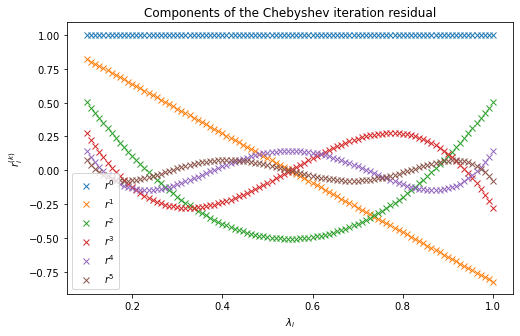

In [4]:
n = 100
lambda_min = 0.1
lambda_max = 1.
lambdas = np.linspace(lambda_min,lambda_max,n)
A = diags(lambdas)
x0 = np.zeros(n)
b = np.ones(n)
xs, rs = chebyshev_iteration(A, lambda_min, lambda_max, b, x0, 5)
ax = plt.figure(figsize=(8,5)).gca()
ax.set(title="Components of the Chebyshev iteration residual")
ax.set(xlabel=r'$\lambda_i$')
ax.set(ylabel=r'$r^{(k)}_i$')
for i in range(6):
    ax.plot(lambdas, rs[i], 'x', label='$r^{}$'.format(i))
_ = ax.legend()

In the conjugate gradient method, solution $x^{(m)}$ has error $e^{(m)} = x^\star - x^{(m)}  = r(A) (x^\star - x^{(0)})$ that is optimal:

$$r(A) = \mathop{\arg\min}_{p \in \mathbb{P}^{m}, p(0)=1} \| p(A)(x^\star - x^{(0)})\|_A.$$

The resulting polynomial:

- depends on $e^{(0)} = A^{-1} r^{(0)}$, and
- depends on the intermediate eigenvalues.

**Activity 1 (2 points):** _Dependence on $e^{(0)}$._

Adapt the above visualization of the Chebyshev residual to a visualization of the error polynomial generated by the conjugate gradient method.

1. Generate a diagonal matrix $A$ with linearly spaced eigenvalues between $\lambda_\min$ and $\lambda_\max$, same as before.
2. Choose some $x^\star$ that is non-zero in each component and $x^{(0)} = 0$.
3. Generate the history $\{x^{(m)}\}$.
4. For each $x^{(m)}$, compute $e^{(m)} = x^\star - x^{(0)}$.
5. Plot $e^{(m)} / e^{(0)}$ all in the same graph.

You should do this twice:

A. Once when $x^\star_i = \lambda_i^r$ for some $r < -1$ (so that the majority of the initial error is concentrated in the _smaller_ eigenvalues)

B. Once when $x^\star_i = \lambda_i^r$ for some $r > 1$ (so that the majority of the initial error is concentrated in the _larger_ eigenvalues)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Activity 2 (2 points):** _Dependence on intermediate eigenvalues._

Repeat your plots, but this time instead of choosing two different $x^\star$,
use only $x^\star_i = \lambda_i^{-1}$, but try different choices for the spectrum $\{\lambda_i\}$.

You should do this twice:

A. Once when the eigenvalues are clustered near the endpoints

B. Once when the eigenvalues are clustered near the middle

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Activity 3 (2 points):** _Convergence comparison._

Take the matrix $A$ below (which has the spectrum of a 3D finite difference Lapalacian),
generate 30 random $r^{(0)}$ (each with $\|r^{(0)}\|=1$) and compute the convergence histories with the Chebyshev iteration and conjugate gradient method for 20 iterations.  Plot all of the residual norms on the same semilogy plot in a way that we can see the difference between the two methods (with two different colors and/or different markers).

After you make your plot: what do you notice about these two methods that have similar bounds on the convergence rate?

In [ ]:
n = 5
l1 = (1. - np.cos(np.array(list(range(1,n+1))) * np.pi / (n + 1)))
ones = diags(np.ones(n))
ones2 = diags(np.ones(n**2))
d1 = diags(l1)
A = kron(d1, ones2) + kron(kron(ones, d1), ones) + kron(ones2, d1)
N = A.shape[0]
lambda_min = A.diagonal().min()
lambda_max = A.diagonal().max()
x0 = np.zeros(N)
print(lambda_min, lambda_max)
maxiter = 20


ax = plt.figure(figsize=(13,8)).gca()
for itr in range(30):
    # YOUR CODE HERE
    raise NotImplementedError()
plt.show()

YOUR ANSWER HERE